In [1]:
from IPython.core.display import display, HTML, Markdown
import copy
import numpy as np
import matplotlib.pyplot as plt
from networkx import nx

n = 20
# segue una lista di precedenze della forma [u,v], cl significato che u deve essere schedulato oprima di v.
prec_original_instance = [
       [7,4],
       [0, 1],   # l'attività 0 deve essere schedulata prima dell'attività 1
       [0, 4],
       [0, 7],
       [0, 15],
       [3, 4],
       [1, 4],
       [9, 7],
       [1, 15],
       [1, 18],
       [18,0],
]

prec_original_instance2 = [
       [7,4],
       [0, 1],   # l'attività 0 deve essere schedulata prima dell'attività 1
       [0, 4],
       [0, 7],
       [0, 15],
       [3, 4],
       [1, 4],
       [9, 7],
       [1, 15],
       [18, 1],
       [18,0],
]

In [27]:

def visualizza_e_valuta_le_precedenze_non_rispettate(soluzione_problem_solver,lista_di_precedenze=1,silent=False):
    #controllo sulla lunghezza della lista fornita
    if(len(soluzione_problem_solver)!=n):
        #modifcare l'output, dire di che lunghezza voglio la lista e di che lunghezza l'ha data lui
        if(silent):
            return 0
        else:
            return "hai fornito una soluzione di lungezza "+str(len(soluzione_problem_solver)) + ", \
dovresti fornirla di lunghezza "+str(n)
    
    check=np.zeros(len(soluzione_problem_solver))
    #incremento la posizione soluzione_problem_solver[i] di uno , se sono inseriti tutti correttamente avrò
    #un array di soli 1
    for i in range(len(soluzione_problem_solver)):
        try:
            check[soluzione_problem_solver[i]]=check[soluzione_problem_solver[i]]+1
        except:
            if(silent):
                return 0
            else:
                return "hai inserito l'attività "+str(soluzione_problem_solver[i])+", ti ricordo che le attività \
vanno da 0 a " + str(n-1)
                    
    
    contatore_errori=0
    
    #la lista contiene una e una volta sola tutti gli elementi
    if(np.all((check == 1))):
        if(lista_di_precedenze==1):
            for element in prec_original_instance:
                indice1=soluzione_problem_solver.index(element[0])
                indice2=soluzione_problem_solver.index(element[1])
                if(indice1>indice2):
                    contatore_errori=contatore_errori+1
        if(lista_di_precedenze==2):
                for element in prec_original_instance2:
                    indice1=soluzione_problem_solver.index(element[0])
                    indice2=soluzione_problem_solver.index(element[1])
                    if(indice1>indice2):
                        contatore_errori=contatore_errori+1
        if(lista_di_precedenze!=2 and lista_di_precedenze!=1):
            return "Vorresti valutare la tua soluzione rispetto alla lista di precedenze numero \
" +str(lista_di_precedenze)+ " ti ricordo che le liste di precedenze sono 2, \
se vuoi valutare la tua soluzione rispetto alla prima lista digita 1 , altrimenti 2"
        
        if(contatore_errori==0):
            if(silent):
                return 1
            else:
                return "Sei riuscito a rispettare tutte le precedenze, hai dimostrato che il grafo fornito è un DAG!"
        else:
            if(silent):
                return 0
            else:
                return "non hai rispettato "+str(contatore_errori)+" precedenze "
        
    #manca un elemento e/o un elemento viene ripetuto più di una volta
    else:
        if(silent):
            return 0
        else:
            for k in range(len(check)):
                if(check[k]==0):
                    if(silent):
                        return 0
                    else:
                        return "l'array NON contiene tutte le attività, l'attività numero " + str(k) + " non è presente "

def visualizza(ordinamento):
    G = nx.DiGraph()
    # mathplotlib o networkx o ?
    # visualizziammo il grafo coi nodi sulla linea nelle posizioni specificate da ordinamento e gli archi che fanno panza per poterli vedere
    # il problem-solver deve rendersi conto di quali archi sono rivolti all'indietro.
    #for i in range(len(ordinamento)-1):
    #    G.add_edge(ordinamento[i],ordinamento[i+1])
    G.add_edges_from(ordinamento)
    nx.draw_planar(G,with_labels=True,arrows=True)
    plt.plot()
    
def ciclo_di_precedenze(soluzione_problem_solver,lista_di_precedenze=1,silent=False):
    lunghezza=len(soluzione_problem_solver)
    precedenze_da_valutare=0
    if(lista_di_precedenze==1):
        precedenze_da_valutare=prec_original_instance
    if(lista_di_precedenze==2):
        precedenze_da_valutare=prec_original_instance2
    if(lista_di_precedenze!=1 and lista_di_precedenze!=2):
        if(silent):
            return 0
        else:
            return "Vorresti valutare la tua soluzione rispetto alla lista di precedenze numero \
" +str(lista_di_precedenze)+ " ti ricordo che le liste di precedenze sono 2, \
se vuoi valutare la tua soluzione rispetto alla prima lista digita 1 , altrimenti 2"
    #la lista contiene una e una volta sola tutti gli elementi
    if ([soluzione_problem_solver[(len(soluzione_problem_solver)-1)],soluzione_problem_solver[0]] in precedenze_da_valutare):
        for i in range(len(soluzione_problem_solver)-1):
            if([soluzione_problem_solver[i],soluzione_problem_solver[i+1]] not in precedenze_da_valutare):
                if(silent):
                    return 0
                else:
                    return  "sembra che la tua lista non contenga un ciclo, controlla le precedenze tra l'attività " + str(soluzione_problem_solver[i]) + " e  l'attività " + str(soluzione_problem_solver[i+1])
        if(silent):
            return 1
        else:
            return "La sequenza di nodi"+ str(soluzione_problem_solver)+" che hai fornito descrive un ciclo presente in G"
    else:
        if(silent):
            return 0
        else:
            return "sembra che la tua lista non contenga un ciclo , controlla le precedenze tra l'attività " + str(soluzione_problem_solver[lunghezza-1]) +  " e  l'attività " + str(soluzione_problem_solver[lunghezza-lunghezza])
        

def visualizza_icosaedro(grafo):
    front_face = [15, 16, 17, 18, 19]
    back_face = [0, 1, 2, 3, 4]
    middle = list(set(range(20)).difference(front_face + back_face))
    shells = [front_face] + [middle] + [back_face]
    pos = nx.shell_layout(grafo, shells)
    #nx.draw_networkx(icosaedro, pos)
    nx.draw_networkx_nodes(grafo, pos, alpha=0.6) #node_color='cyan',
    nx.draw_networkx_labels(grafo, pos)
    #disegna archi e etichette sugli archi
    #positive=[(u,v) for (u,v,d) in grafo.edges(data=True) if d['w'] >= 0]
    #negative=[(u,v) for (u,v,d) in grafo.edges(data=True) if d['w'] < 0]
    positive=[(u,v)for (u,v,d) in grafo.edges(data=True)]
    
    nx.draw_networkx_edges(grafo,pos,edgelist=positive,width=2,alpha = 0.6,edge_color = "g",arrows=True)
    #nx.draw_networkx_edges(grafo,pos,edgelist=negative,width=2,alpha = 0.6,edge_color = "r",arrows=True)
    
    #labels = nx.get_edge_attributes(grafo,'w')
    #nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels)
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_axis_off()

In [30]:
nodes=[(0+i) for i in range(20)]
edges=prec_original_instance
icosaedro_1=nx.DiGraph()
icosaedro_1.add_nodes_from(nodes)
icosaedro_1.add_edges_from(edges)


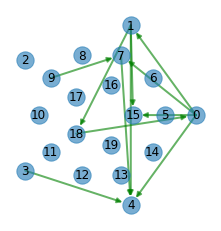

In [31]:
visualizza_icosaedro(icosaedro_1)

In [4]:
#Un grafo diretto è un DAG (un acronimo per Directed Acyclic Graph) se non contiene alcun ciclo diretto. 
#Un ciclo diretto in un grafo diretto G=(V,A) è una sequenza ciclica di nodi tale che
#la coppia ordinata (u,v) sia arco di G ogniqualvota u e v appaiano consecutivi ed in questo ordine 
#entro la sequenza, oppure u sia l'ultimo nodo e v il primo. Questo esercizio ti chiede di riconoscere se 
#un grafo G diretto a tè assegnato è un DAG oppure no, esprimendo il certificato del caso (o una sequenza 
#ciclica di nodi che indichi il ciclo o un ordinamento dei nodi tale che ogni arco di G sia rivolto in avanti 
#entro l'ordinamento). 
#In realtà ti forniremo due diverse istanze di questo problema e ti chiederemo di stabilire quale delle due offra 
#un DAG e quale no.

In [20]:
# Riesci a fornire una sequenza ciclica S di attività tale che se a precede immediatemente b in S allora [a,b] è una precedenza richiesta.
# Nota: per sequenza ciclica intendiamo che, dove s e t siano il primo e l'ultimo elemento nella sequenza allora si possa dire che t precede immediatemente s. 
# Nota: Ti vengono fornite 2 liste di precedenze, ricorda che la fuzione ha bisogno,oltre che alla lista fornita da te, il numero della lista di precedenze
#       rispetto alla quale vuoi verificare che la tua lista contenga un ciclo. inserisci 1 per la prima o 2 per la seconda.
ciclo  = [0,1,18]            
print(ciclo_di_precedenze(ciclo,2))

sembra che la tua lista non contenga un ciclo, controlla le precedenze tra l'attività 1 e  l'attività 18


Vorresti valutare la tua soluzione rispetto alla lista di precedenze numero 3 ti ricordo che le liste di precedenze sono 2, se vuoi valutare la tua soluzione rispetto alla prima lista digita 1 , altrimenti 2


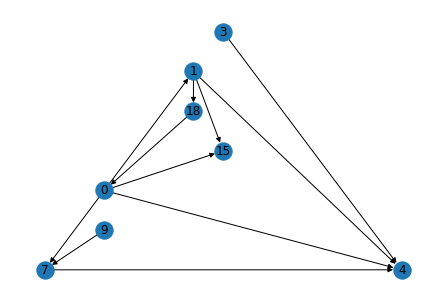

In [30]:
# Ordina le attività in modo da rispettare tutte le precedenze, se ritieni che non sia possibile cerca di
#minimizzare il numero di precedenze non rispettate.
# Le attività sono rappresentate dai numeri compresi da 0 a n-1
#Nota: Ti vengono fornite 2 liste di precedenze, ricorda che la fuzione ha bisogno,oltre che alla lista fornita da te, il numero della lista di precedenze
#       rispetto alla quale vuoi verificare che la tua lista non contenga un ciclo. inserisci 1 per la prima o 2 per la seconda.

lista_da_sinistra_a_destra = [4, 7, 2, 0, 11, 5, 19, 18, 6, 17, 14, 16, 3, 1, 9, 13, 8, 12 ,15, 10]


print(visualizza_e_valuta_le_precedenze_non_rispettate(lista_da_sinistra_a_destra,1))
#visualizza(prec_original_instance)

In [ ]:
#link utili alla risoluzione dell'esercizio
# https://en.wikipedia.org/wiki/Directed_acyclic_graph